In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
%matplotlib inline

In [2]:
train = pd.read_csv("./data/SmplHDataset.csv")

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Frequency')

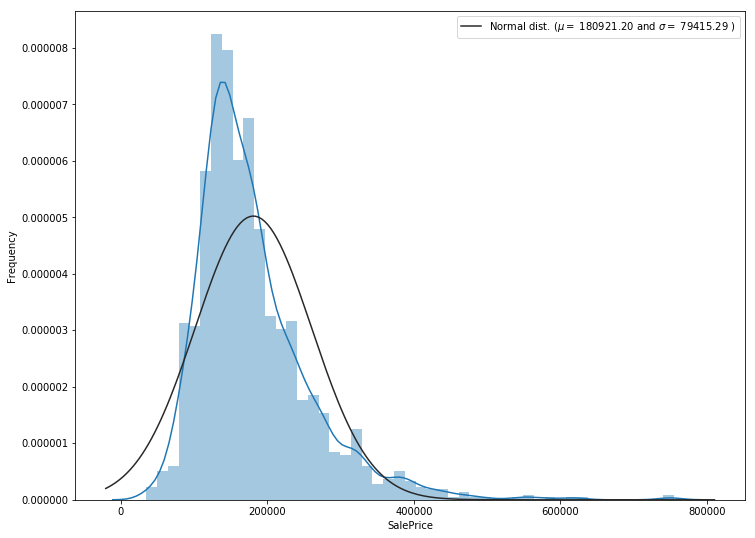

In [3]:
plt.subplots(figsize=(12,9))
sns.distplot(train['SalePrice'], fit=stats.norm)
(mu, sigma) = stats.norm.fit(train['SalePrice'])
# plot with the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

In [4]:
train.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
                 ... 
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
3SsnPorch           0
BsmtUnfSF           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
Functional          0
TotRmsAbvGrd        0
KitchenQua

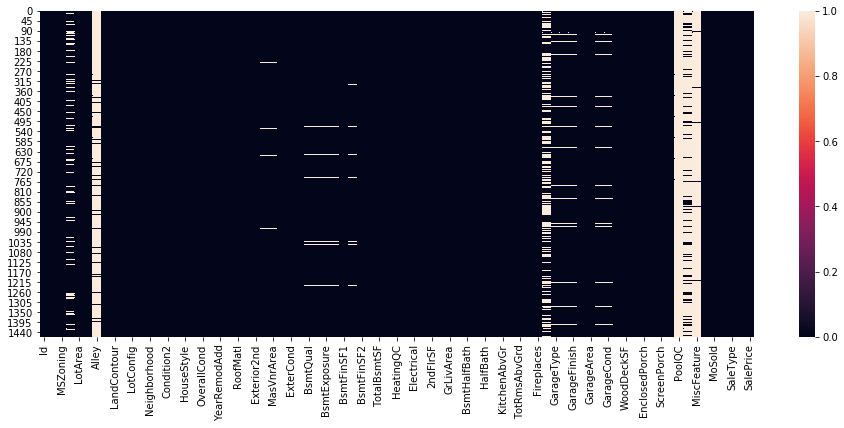

In [5]:
plt.figure(figsize=(16, 6))
sns.heatmap(train.isnull())
plt.show()

In [6]:
Isnull = train.isnull().sum()/len(train)*100
Isnull = Isnull[Isnull>0]
Isnull.sort_values(inplace=True, ascending=False)
Isnull

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [7]:
#Convertion en dataframe
Isnull = Isnull.to_frame()

In [8]:
Isnull.columns = ['count']
Isnull.index.names = ['Name']
Isnull['Name'] = Isnull.index

In [9]:
Isnull.head()

,count,Name
Name,,
PoolQC,99.520548,PoolQC
MiscFeature,96.301370,MiscFeature
Alley,93.767123,Alley
Fence,80.753425,Fence
FireplaceQu,47.260274,FireplaceQu


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

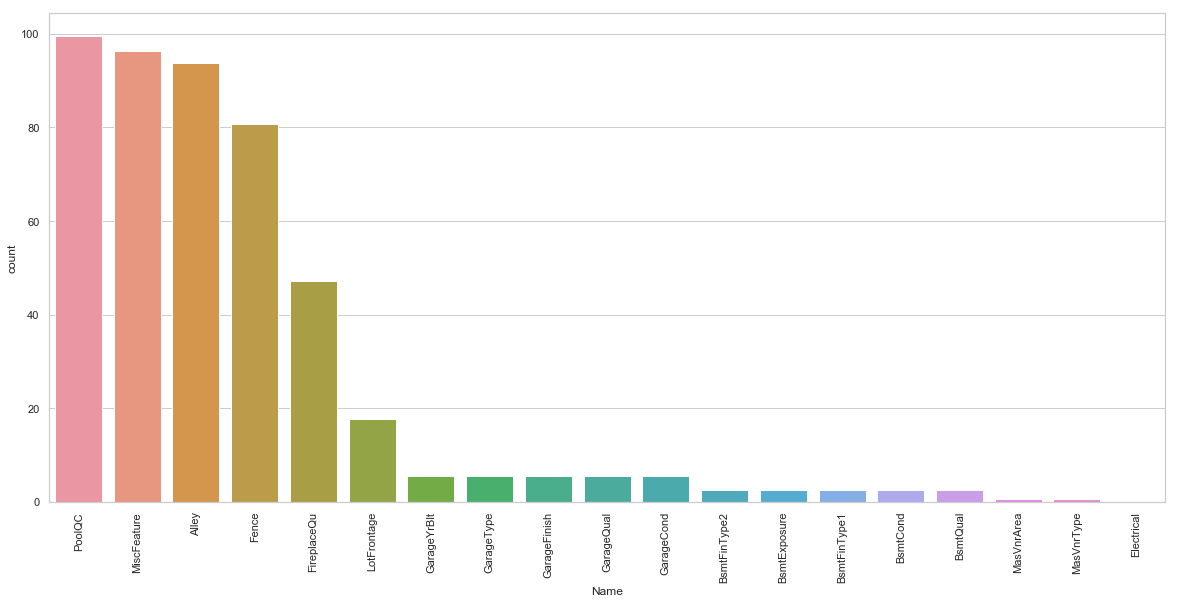

In [10]:
#plot Missing values
plt.figure(figsize=(20, 9))
sns.set(style='whitegrid')
sns.barplot(x='Name', y='count', data=Isnull)
plt.xticks(rotation = 90)

In [11]:
#séparer les variables
train_corr = train.select_dtypes(include=[np.number])

In [12]:
train_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
MasVnrArea       1452 non-null float64
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtUnfSF        1460 non-null int64
TotalBsmtSF      1460 non-null int64
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
LowQualFinSF     1460 non-null int64
GrLivArea        1460 non-null int64
BsmtFullBath     1460 non-null int64
BsmtHalfBath     1460 non-null int64
FullBath         1460 non-null int64
HalfBath         1460 non-null int64
BedroomAbvGr     1460 non-null int64
KitchenAbvGr     1460 non-null int64
TotRmsAbvGrd     1460 non-null int64
F

In [13]:
#voir les datas 
numeric_cells = train._get_numeric_data()
categorical_cells = list(set(train.columns) - set(numeric_cells.columns))
categorical_cells

['LandContour',
 'FireplaceQu',
 'HouseStyle',
 'Fence',
 'BsmtFinType2',
 'Foundation',
 'Exterior1st',
 'MasVnrType',
 'BsmtQual',
 'ExterQual',
 'HeatingQC',
 'BsmtFinType1',
 'Condition1',
 'SaleType',
 'Utilities',
 'Neighborhood',
 'BsmtCond',
 'Street',
 'MSZoning',
 'PavedDrive',
 'MiscFeature',
 'Heating',
 'LandSlope',
 'CentralAir',
 'GarageFinish',
 'BldgType',
 'PoolQC',
 'LotConfig',
 'Condition2',
 'SaleCondition',
 'RoofMatl',
 'Functional',
 'Alley',
 'RoofStyle',
 'GarageQual',
 'GarageType',
 'GarageCond',
 'Electrical',
 'Exterior2nd',
 'ExterCond',
 'LotShape',
 'BsmtExposure',
 'KitchenQual']

In [14]:
train_corr.shape

(1460, 38)

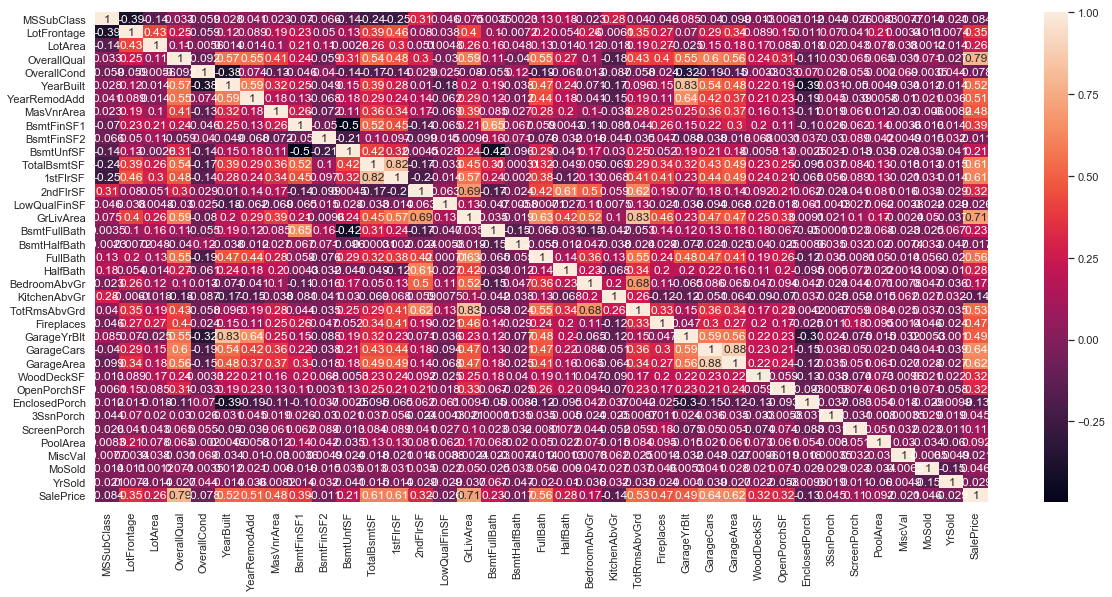

In [15]:
del train_corr['Id']
#plot 
corr = train_corr.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr, annot=True)

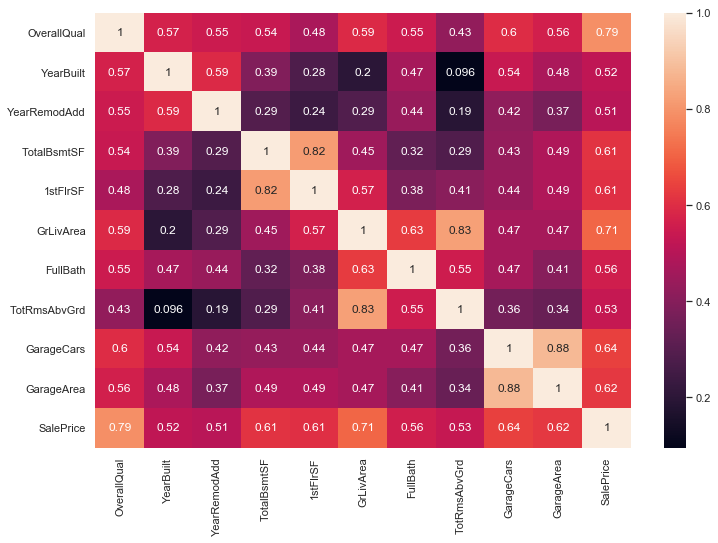

In [16]:
top_feature = corr.index[abs(corr['SalePrice']>0.5)]
plt.subplots(figsize=(12, 8))
top_corr = train[top_feature].corr()
sns.heatmap(top_corr, annot=True)
#plt.show()

In [17]:
#étude de OverallQual 
train.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

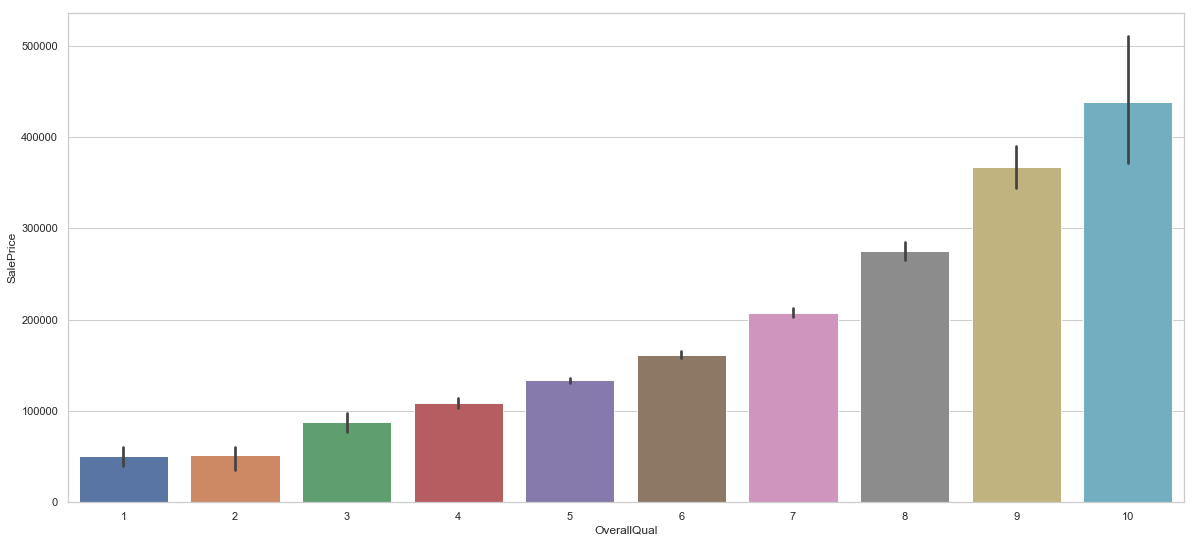

In [18]:
plt.subplots(figsize=(20,9))
sns.barplot(train.OverallQual, train.SalePrice)

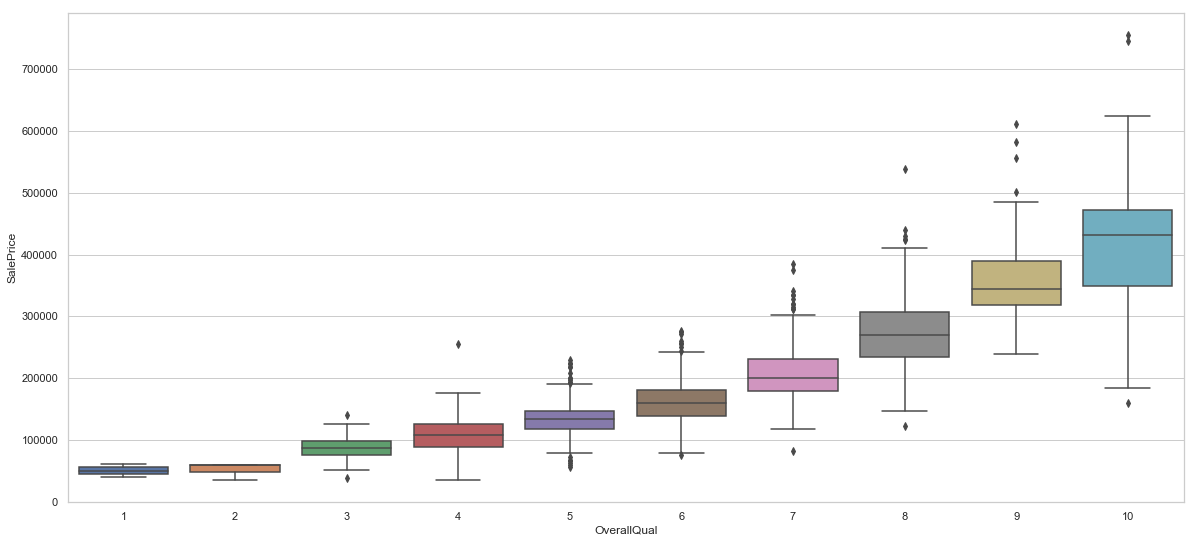

In [19]:
#petite valeurs abérante ! 
plt.subplots(figsize=(20,9))
sns.boxplot(x=train.OverallQual, y=train.SalePrice)

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


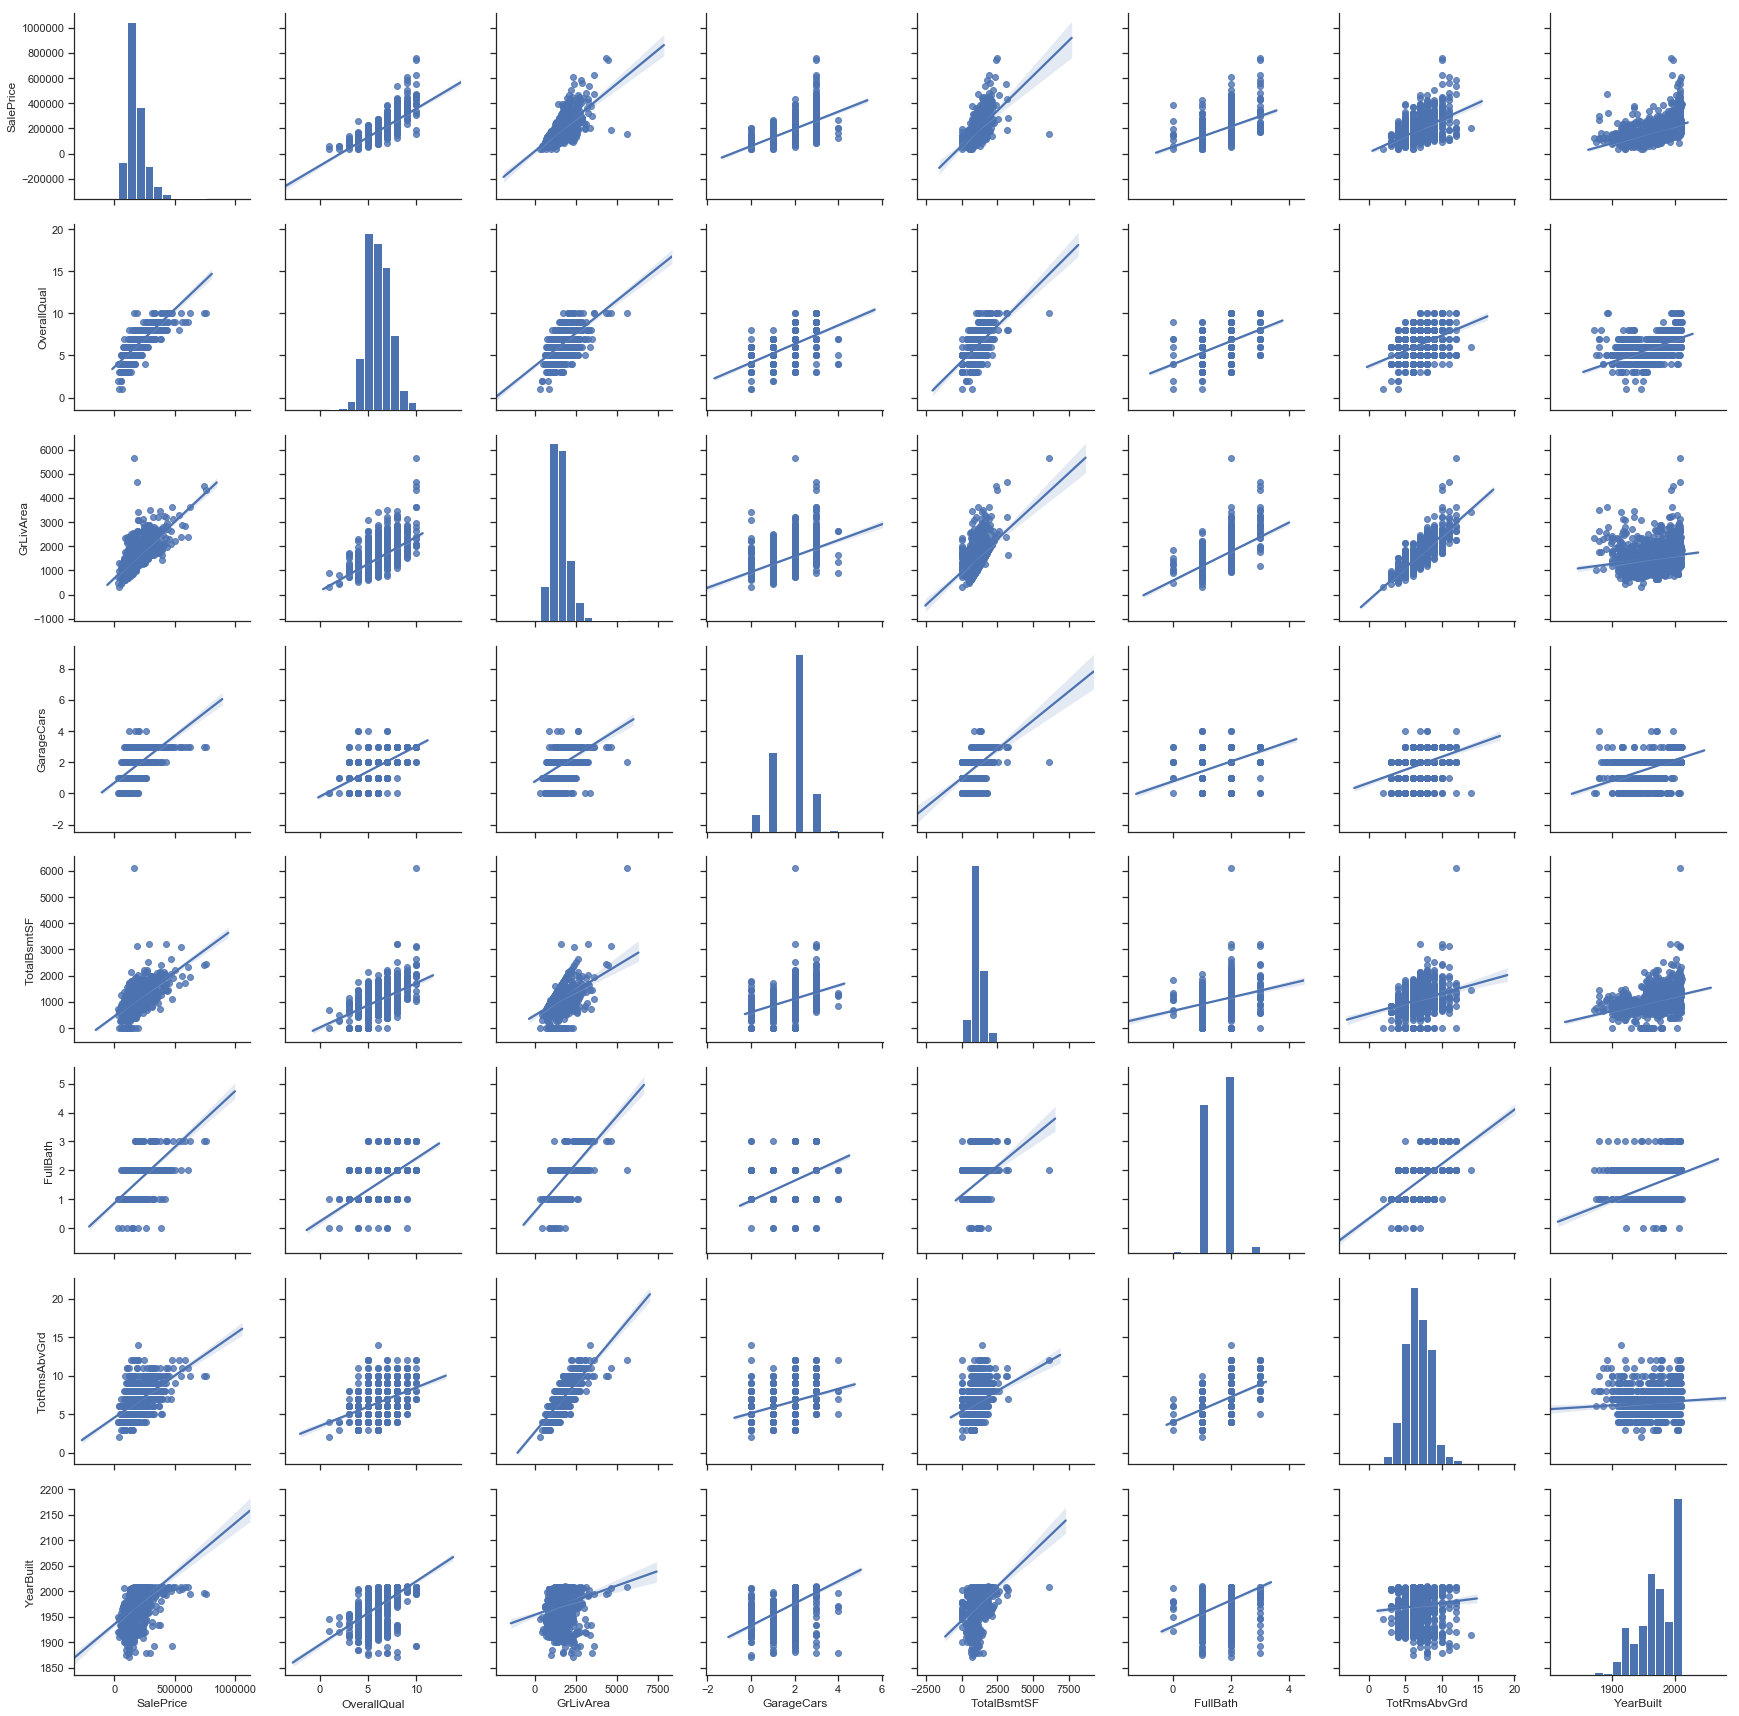

In [20]:
col = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
sns.set(style='ticks')
sns.pairplot(train[col], size=3, kind='reg')

In [21]:
print("Find most important features relative to target")
corr = train.corr()
corr.sort_values(['SalePrice'], ascending=False, inplace=True)
corr.SalePrice[0:7]

Find most important features relative to target


SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
TotalBsmtSF    0.613581
1stFlrSF       0.605852
Name: SalePrice, dtype: float64

In [22]:
#remplissage avec des fonctions 

def getNullsOf(dataframe):
    df = dataframe.isnull().sum().sort_values(ascending=False)
    df = df[df > 0] # keeping values that > 0
    return df

print("Avant :\n", train["LotFrontage"].head(20))

def fillWithMean(name):
    numeric_cells[name] = numeric_cells[name].fillna(numeric_cells[name].mean())
    train[name] = numeric_cells[name]
for name in getNullsOf(train_corr).index.tolist():
    fillWithMean(name)

print("Après :\n", train["LotFrontage"].head(20))

Avant :
 0     65.0
1     80.0
2     68.0
3     60.0
4     84.0
5     85.0
6     75.0
7      NaN
8     51.0
9     50.0
10    70.0
11    85.0
12     NaN
13    91.0
14     NaN
15    51.0
16     NaN
17    72.0
18    66.0
19    70.0
Name: LotFrontage, dtype: float64
Après :
 0     65.000000
1     80.000000
2     68.000000
3     60.000000
4     84.000000
5     85.000000
6     75.000000
7     70.049958
8     51.000000
9     50.000000
10    70.000000
11    85.000000
12    70.049958
13    91.000000
14    70.049958
15    51.000000
16    70.049958
17    72.000000
18    66.000000
19    70.000000
Name: LotFrontage, dtype: float64


On peut aussi faire ca de façon plus clean en grouppant par neighborhood et fill avec la mediane de LotFrontage de tout les neighborhood . 
```
train['LotFrontage'] = train.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
```

In [23]:
#encodage 
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold', 'MSZoning', 'LandContour', 'LotConfig', 'Neighborhood',
        'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'Foundation', 'GarageType', 'MiscFeature', 
        'SaleType', 'SaleCondition', 'Electrical', 'Heating')
len(cols)

47

In [24]:
from sklearn.preprocessing import LabelEncoder
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(train[c].values)) 
    train[c] = lbl.transform(list(train[c].values))

In [25]:
#target def 
y = train['SalePrice']

In [26]:
del train['SalePrice']

In [27]:
X = train.values
y = y.values

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null int64
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null int64
Alley            1460 non-null int64
LotShape         1460 non-null int64
LandContour      1460 non-null int64
Utilities        1460 non-null object
LotConfig        1460 non-null int64
LandSlope        1460 non-null int64
Neighborhood     1460 non-null int64
Condition1       1460 non-null int64
Condition2       1460 non-null int64
BldgType         1460 non-null int64
HouseStyle       1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null int64
RoofMatl         1460 non-null int64
Exterior1st      1460 non-null int64
Ex

In [29]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
#encodage des variables 
for category in categorical_cells:
    train[category] = encoder.fit_transform(train[category])
#viz
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,5,3,65.0,8450,1,2,3,3,0,...,0,0,3,4,4,0,1,2,8,4
1,2,0,3,80.0,9600,1,2,3,3,0,...,0,0,3,4,4,0,4,1,8,4
2,3,5,3,68.0,11250,1,2,0,3,0,...,0,0,3,4,4,0,8,2,8,4
3,4,6,3,60.0,9550,1,2,0,3,0,...,0,0,3,4,4,0,1,0,8,0
4,5,5,3,84.0,14260,1,2,0,3,0,...,0,0,3,4,4,0,11,2,8,4


In [30]:
X = train.values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [32]:
print("Valeur prédite : " + str(model.predict([X_test[142]])))
print("Valeur réel : " + str(y_test[142]))

Valeur prédite : [200129.54241979]
Valeur réel : 178000


In [33]:
print("Accuracy du model linéaire simple --> {}% ".format(model.score(X_test, y_test)*100))

Accuracy du model linéaire simple --> 83.91394886272315% 


In [67]:
modelR = Ridge(alpha=100)
modelR.fit(X_train, y_train)
print("Valeur prédite : " + str(modelR.predict([X_test[142]])))
print("Valeur réel : " + str(y_test[142]))
print("Accuracy du model ridge --> {}% ".format(modelR.score(X_test, y_test)*100))

Valeur prédite : [196453.78681473]
Valeur réel : 178000
Accuracy du model ridge --> 84.86216673996398% 


In [66]:
modelL = Lasso(alpha=100)
modelL.fit(X_train, y_train)
print("Valeur prédite : " + str(modelL.predict([X_test[142]])))
print("Valeur réel : " + str(y_test[142]))
print("Accuracy du model lasso --> {}% ".format(modelL.score(X_test, y_test)*100))

Valeur prédite : [199427.91939558]
Valeur réel : 178000
Accuracy du model lasso --> 84.11000883988193% 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


# Viz

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


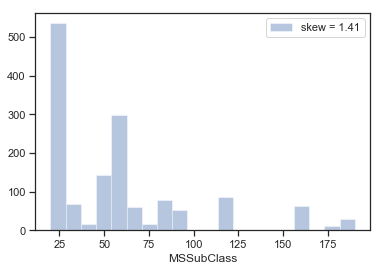

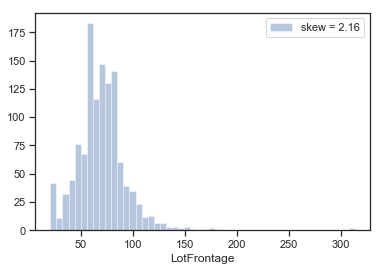

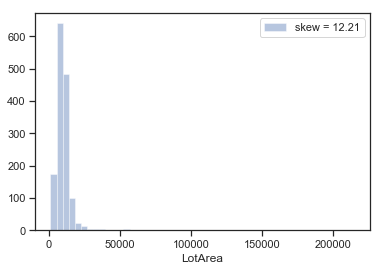

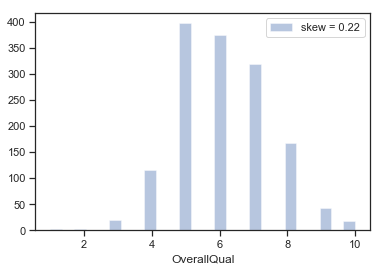

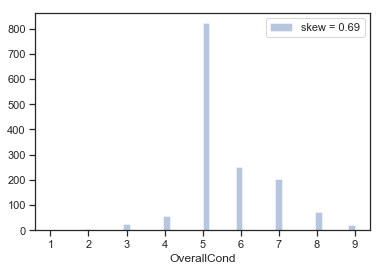

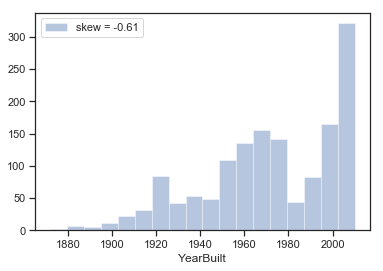

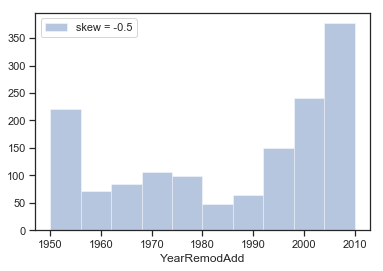

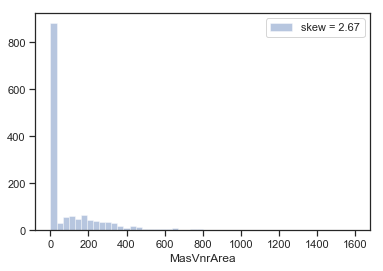

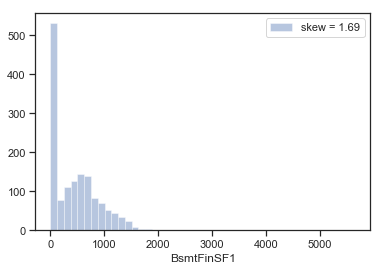

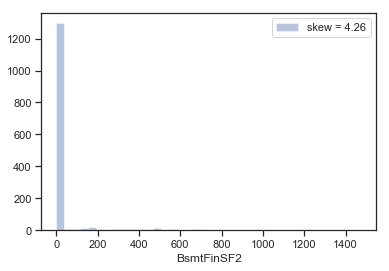

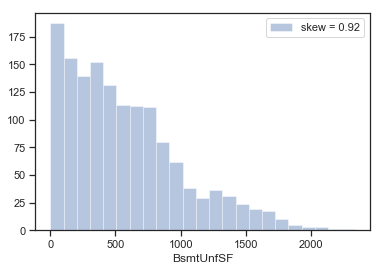

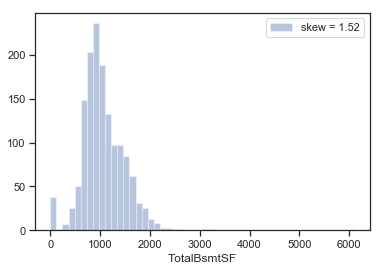

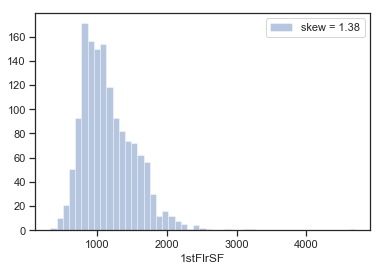

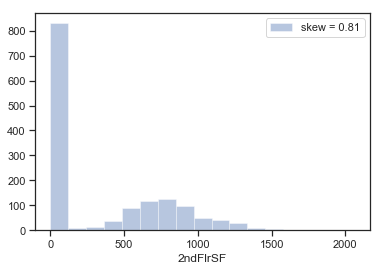

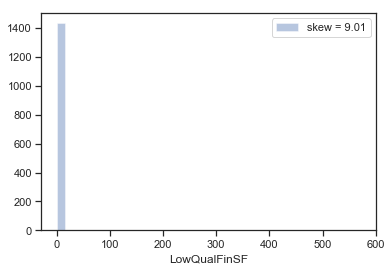

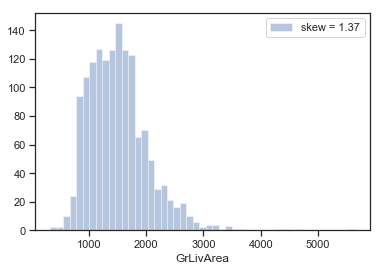

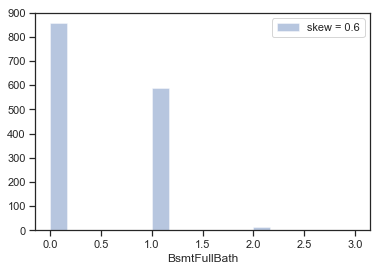

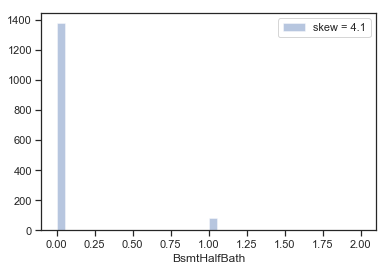

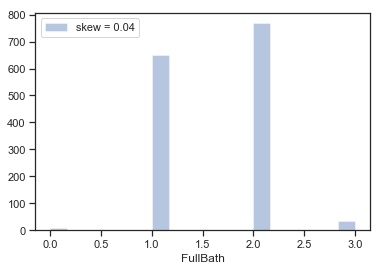

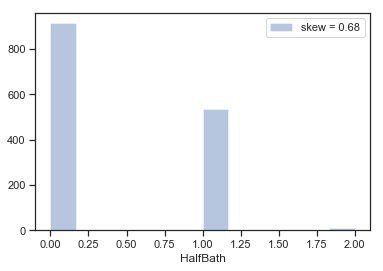

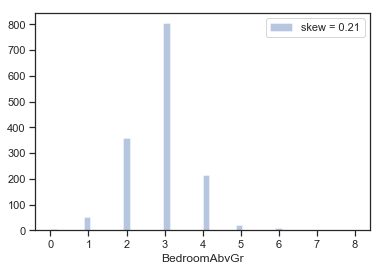

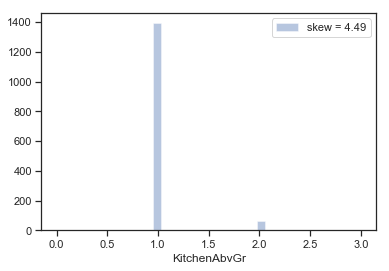

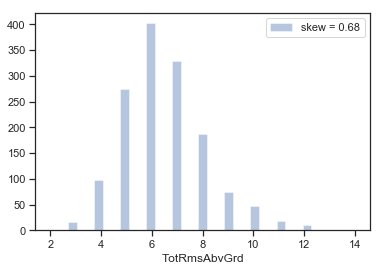

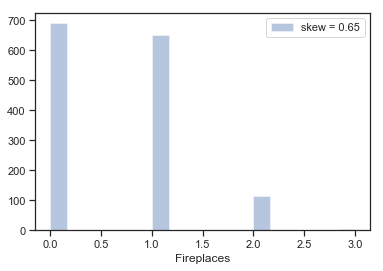

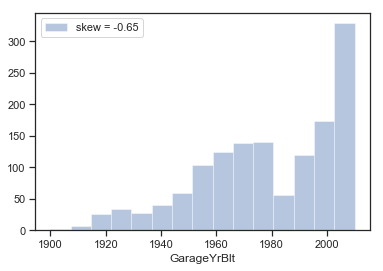

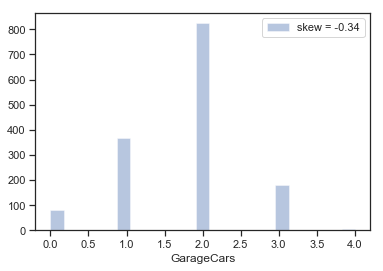

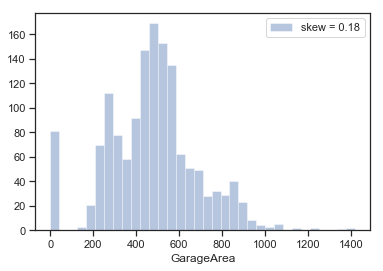

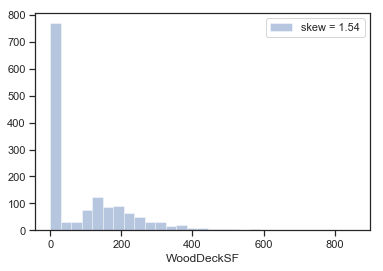

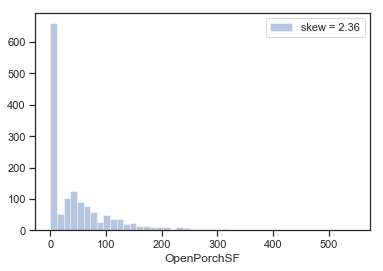

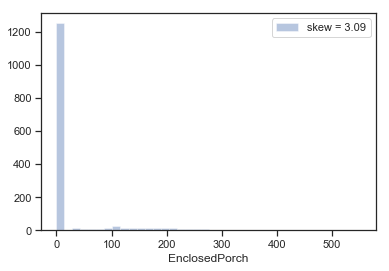

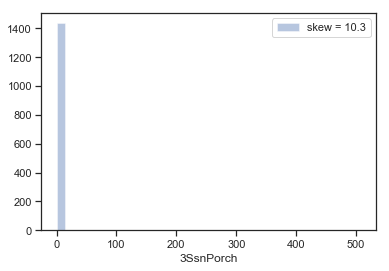

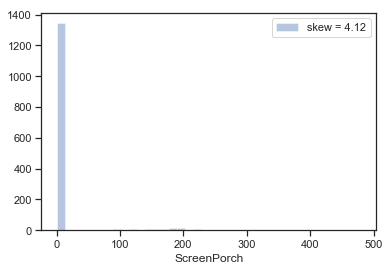

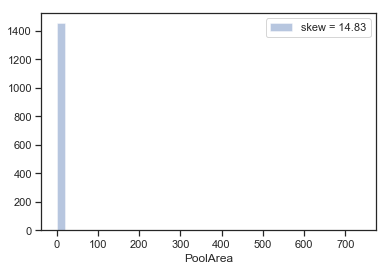

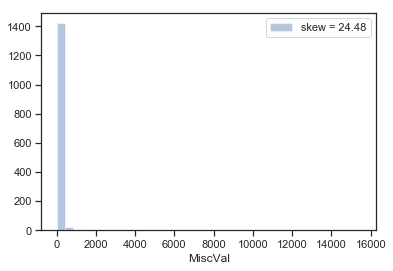

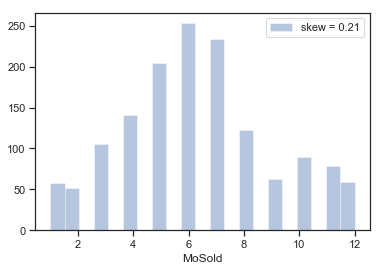

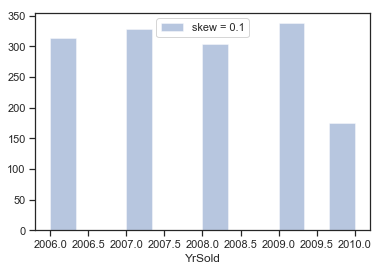

In [70]:
df_train = pd.read_csv("./data/SmplHDataset.csv")
skews = df_train.skew()
for col in df_train.drop(["Id","SalePrice"], axis=1).columns.tolist():
    if (df_train[col].dtype == 'float64') or (df_train[col].dtype == 'int64') :
        sns.distplot(df_train[col].dropna(), kde=False, label="skew = " + str(round(skews[col],2)) )
        plt.legend()
        plt.show()
        
del skews     

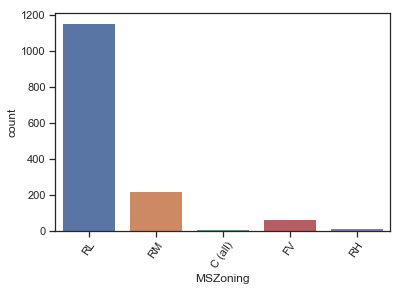

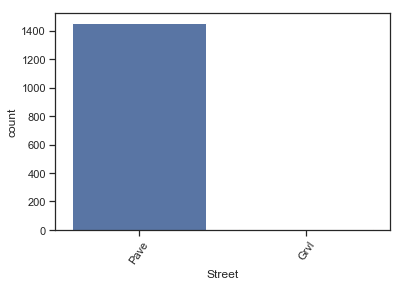

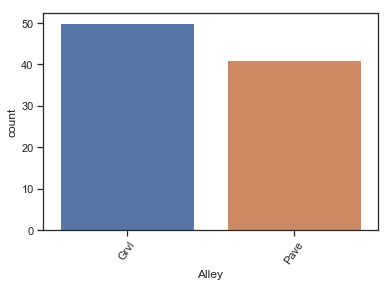

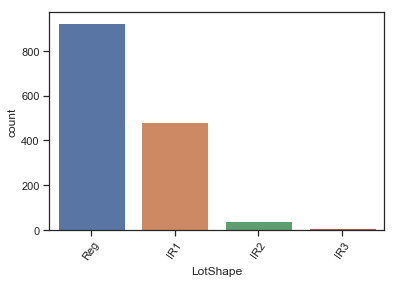

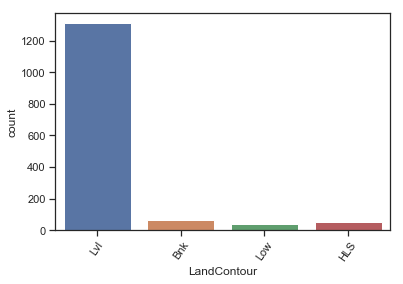

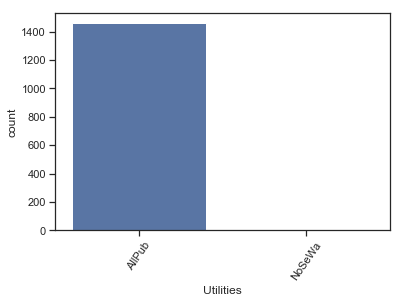

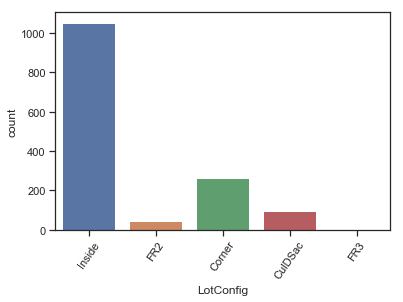

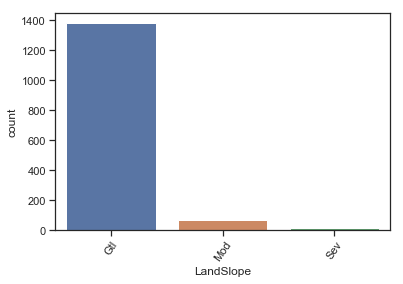

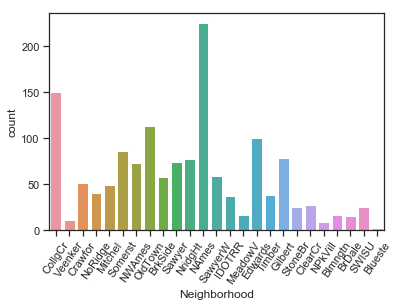

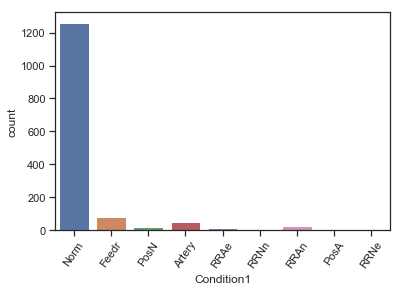

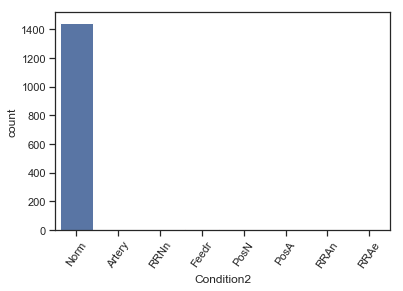

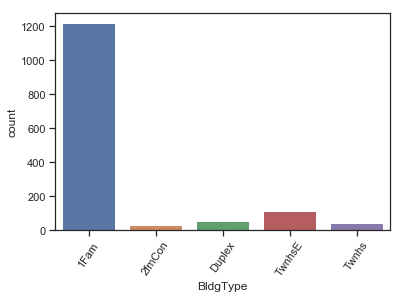

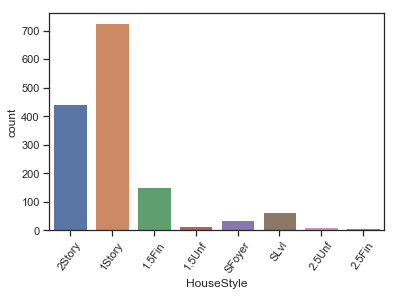

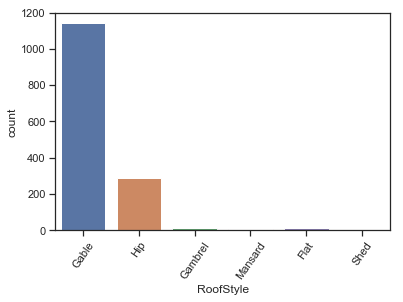

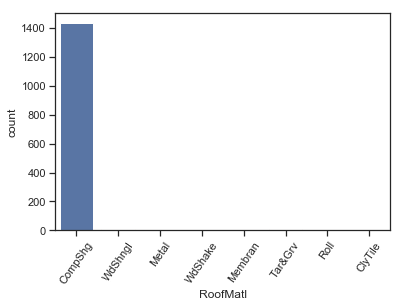

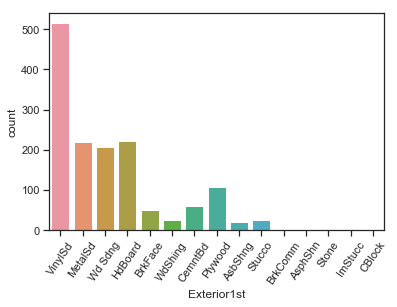

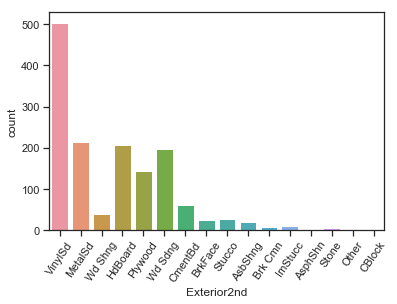

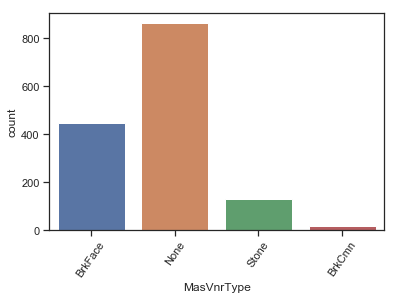

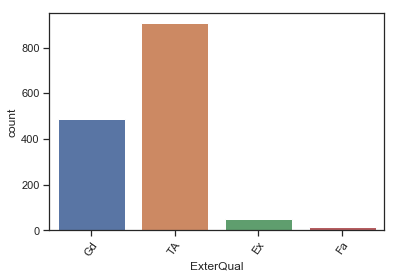

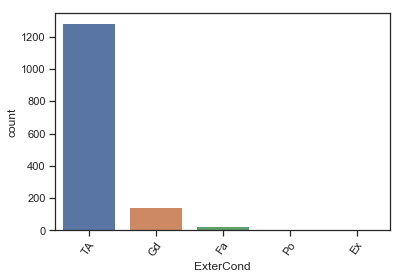

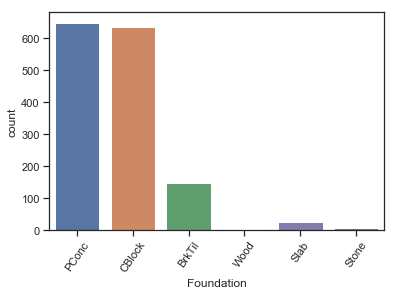

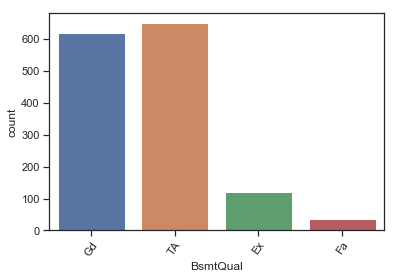

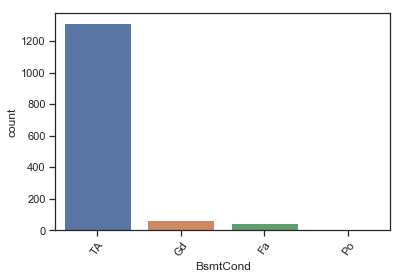

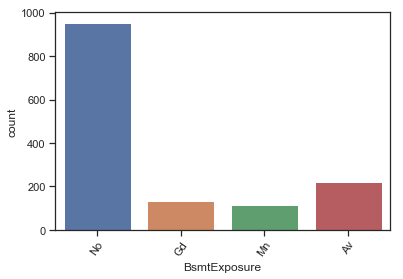

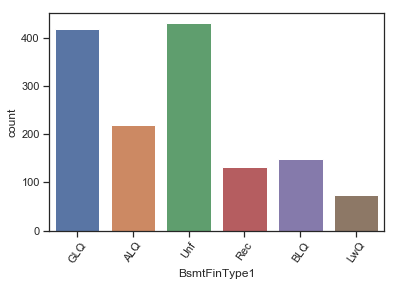

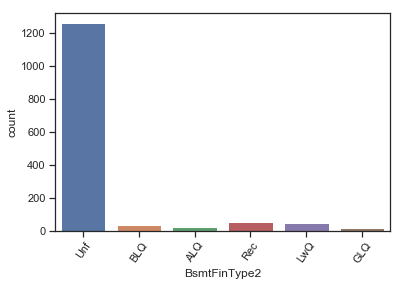

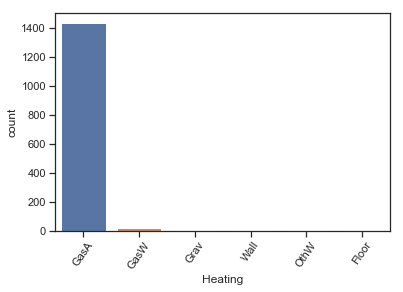

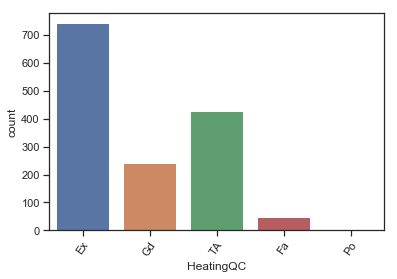

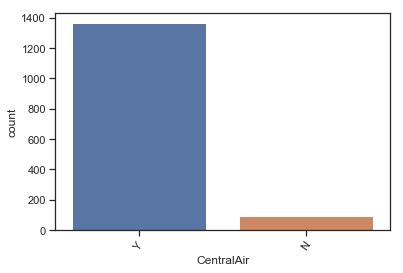

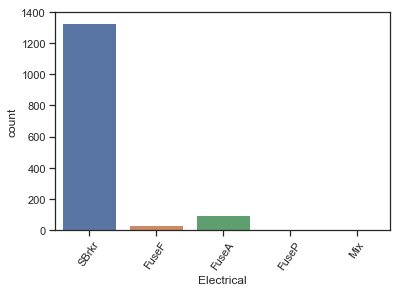

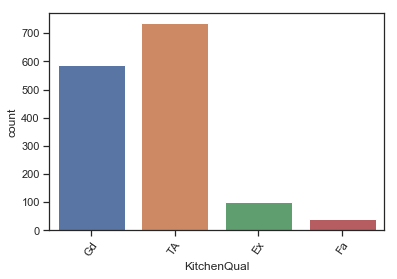

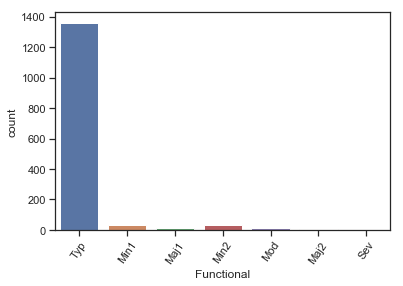

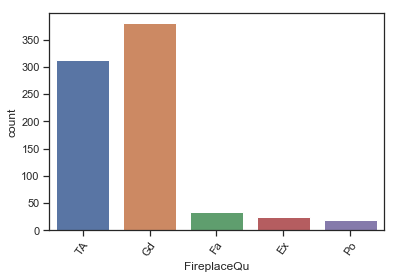

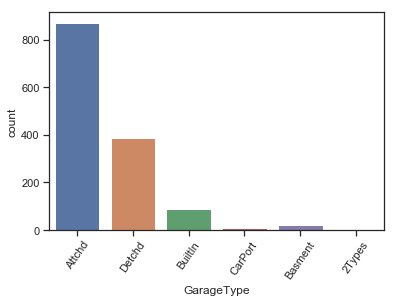

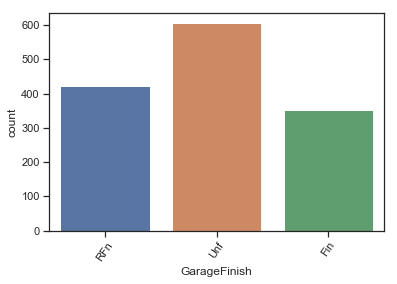

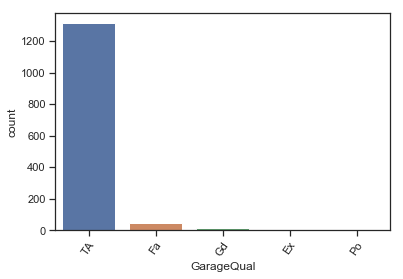

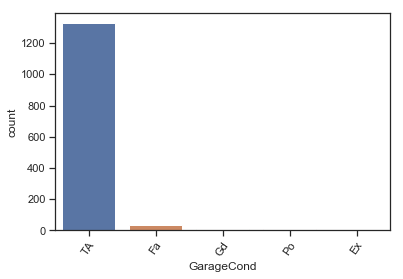

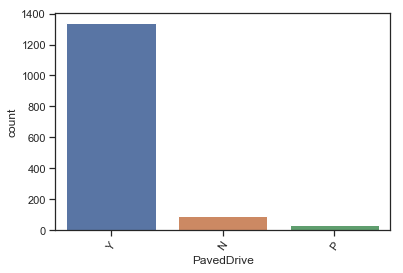

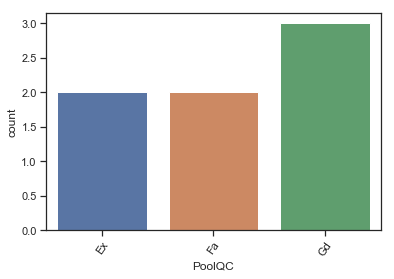

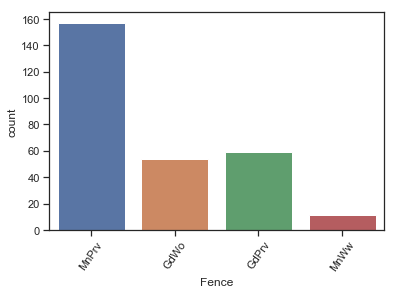

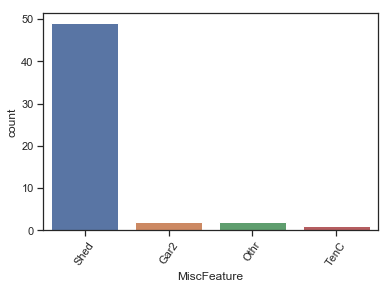

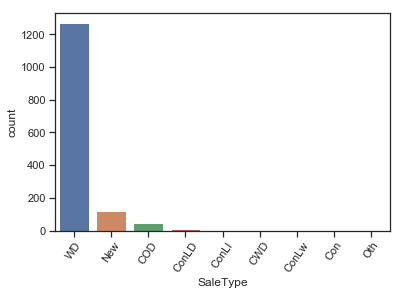

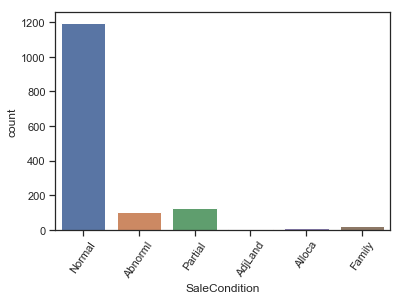

In [117]:
for col in df_train.columns.tolist() : 
    if df_train[col].dtype == 'object':
        sns.countplot(col, data=df_train)
        plt.xticks(rotation=55)
        plt.show()

<Figure size 864x720 with 0 Axes>

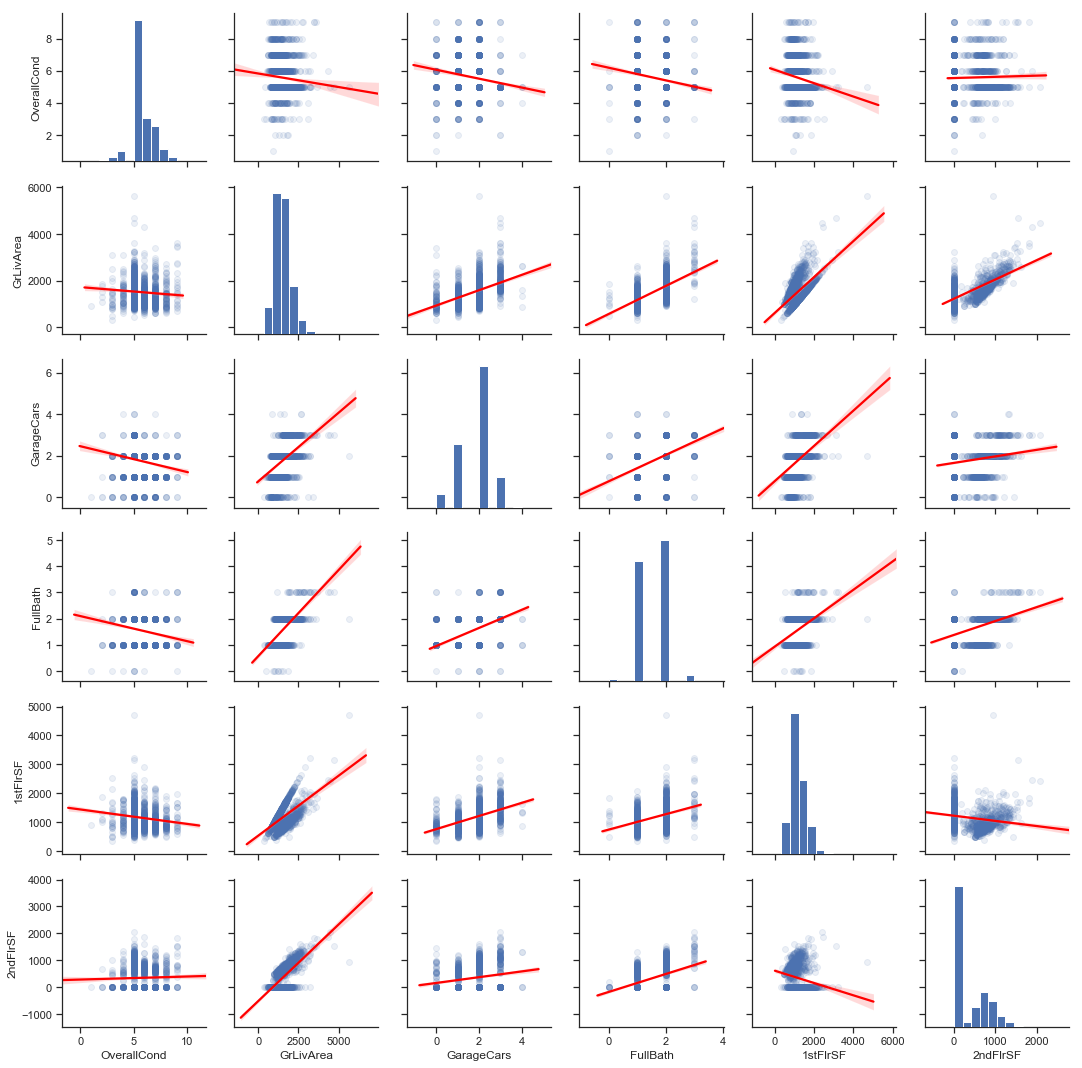

In [119]:
plt.figure(figsize=(12,10))
interesting_cols = ["OverallCond", "GrLivArea", "GarageCars", "FullBath", "1stFlrSF", "2ndFlrSF"]
sns.pairplot(df_train[interesting_cols], dropna=True, kind='reg')
plt.show()

del interesting_cols